In [1]:
#import stuff
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import shapiro
from scipy.fft import fft, fftfreq, ifft
import numpy as np
import datetime

In [1]:
#712 141 at close table
#712 147 at far table
#712 154 at far table
#712 212 at close tabke
#712 243 at close table
#712 246 at close
#712 250 at far

#far switched

#712_318 far
#712 319 far
#712 325 far
#712 330 far
#712 334 far
#712 343 far
#712 347 far
#712 401 far
#712 414 office
#713 940 office
#713 947 office
#713 952 office
#713 1020 office (manual set reset)
#713 1030 office (all automatic settings off)
#713 1040 office (all automatic settings on except for set reset, which is relegated to start)
#713 1054 office (all automatic settings back on)
#713 1058 office (magnetic bar test)
#713 1151 office (improved magnetic bar test)
#713 1236 office (improved magnetic bar test #2)
#713 1248 office (control)
#713 1259 office (magnetic bar test w/o set-reset)
#713 114 office (control for phone/headphones movement)
#713 120 office (control for movement)
#713 122 office (control for movement w/ restraints)
#713 130 office (control for ambulative movement)
#713 132 office (control for ambulative movement (light))
#713 147 office (walking back and forth)
#713 150 office (walking back and forth w/o electronics)
#713 200 office (phone test)

In [2]:
#fileName = "713_132"
#excel = False

'''
This function does basically everything we need. 
Most parameters are self-explanatory. 

"s" and "e" refer to the parts of the dataset that are to be analyzed. 
They are distinguished from skiprows because they pare down the file after it has been read.

Timing=0 is the default in miliseconds. 1 is seconds. 2 is minutes. 3 is hours.

"Correct" refers to experimentally determined calibration vector.

"Nornalizing" is my way of saying making the mean 0.
NormalizeByUnit allows for normalization timeframes to be put in terms of unit of time instead of index
'''

def timeAverage(x,y,z,t,mag,d):
    xav,yav,zav= np.array([np.average(x[i*d:(i+1)*d]) for i in range(len(x) // d)]),np.array([np.average(y[i*d:(i+1)*d]) for i in range(len(y) // d)]),np.array([np.average(z[i*d:(i+1)*d]) for i in range(len(z) // d)])
    return xav,yav,zav,np.sqrt(xav**2 + yav**2 + zav**2),np.array([np.average(t[i*d:(i+1)*d]) for i in range(len(t) // d)])

def bulkFourier(x,y,z,t,mag=[0]):
    return fft(x),fft(y),fft(z),fft(mag),fftfreq(len(x), (t[-1]-t[0]) / (len(t)-1))

def magAnalysis(fileName, d, unit=0,excel = False, skipRows=9, s=0,e=-1, timing=1, correct=True, normalize=False, normalizeStart = 0,normalizeEnd=-1,normalizeByUnit=False):
    if excel:
        data = pd.read_excel(f"{fileName}.xlsx", skiprows = [])
    else:
        data = pd.read_csv(f"{fileName}.csv", skiprows = list(range(skipRows)), on_bad_lines = 'warn', engine = 'python', encoding = 'utf-8')

    #cut inaccurate tail and front off
    r = np.array([list(data['X'][s:e]),list(data['Y'][s:e]), list(np.array(data['Z'][s:e]))])
    t = np.array(data['t'][s:e])
    
    if timing > 0:
        t = t/ 1000
    if timing > 1:
        t = t / 60
    if timing > 2:
        t = t / 60

    #correct via calibrated measurements
    B = np.array([.0435, .166, -.032]) # .045, .166, -.032 on table, old .0435 .166 -.032
    #outside .057 232 .0442
    #at edge of table, .0435, .1596 (58?), -.305 (09?)
    if correct:
        r = np.subtract(r.transpose(), B).transpose()

    #assign
    x, y, z = r
    
    #normalize by subtracting baseline field
    if normalizeByUnit:
        timeStep = (t[-1] - t[0]) / len(t)
        normalizeStart /= timeStep
        normalizeEnd /= timeStep
        normalizeStart = int(normalizeStart)
        normalizeEnd = int(normalizeEnd)
    
    if normalize:
        x -= np.average(x[normalizeStart:normalizeEnd])
        y -= np.average(y[normalizeStart:normalizeEnd])
        z -= np.average(z[normalizeStart:normalizeEnd])
    
    mag = np.sqrt(x**2 + y**2 + z**2)

    #average
    xav,yav,zav,mav,tav=timeAverage(x,y,z,t,mag,d)
    
    #fourier
    xf,yf,zf,mf,tf=bulkFourier(x,y,z,t,mag)

    return([[x,y,z,t,mag], [xav,yav,zav,tav,mav],[xf,yf,zf,tf,mf],[(t[-1]-t[0])/(len(t)-1)]])

In [ ]:
#one dataset in entirety
d=12000
raw,av,fourier,rawStep = magAnalysis("_621_2144", d, timing=3, normalize =False, skipRows = 9,normalizeStart=0, normalizeEnd = 1000, normalizeByUnit=False)
x,y,z,t,mag=raw
xav,yav,zav,tav,mav = av
xf,yf,zf,tf,mf = fourier
rawStep = rawStep[0]
print(rawStep,stepSize:=rawStep*d)


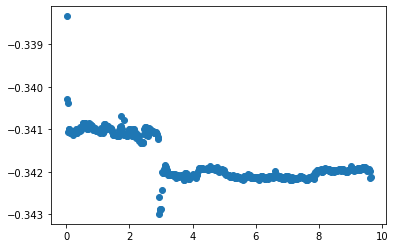

In [24]:
plt.scatter(tav,zav)

In [75]:
import csv

with open('801_430_new.csv', 'w+') as output_file:
    with open('802_330.csv') as input_file:
        reader = csv.reader(input_file, delimiter = '\n')
        for index,line in enumerate(reader):
            if index < 10 or len(line[0].split(',')) == 4:
                output_file.write(line[0])
                output_file.write('\n')

In [521]:
data7284

In [347]:
data7267

In [34]:
tav = datetime.timedelta(minutes=tav)

TypeError: unsupported type for timedelta minutes component: numpy.ndarray

In [269]:
#starting at noon 7/24
xb,yb,zb,tb,mb = magAnalysis("724_1010", 12000, timing=2)[1] #blue
xo,yo,zo,to,mo = magAnalysis("724_125", 12000,timing=2)[1] #orange
xg,yg,zg,tg,mg = magAnalysis("724_332", 12000, timing=2)[1] #green
xr,yr,zr,tr,mr = magAnalysis("724_536", 12000, timing=2)[1] #red
xp,yp,zp,tp,mp = magAnalysis("726_858", 12000, timing =2)[1] #purple

In [340]:
#time offset
tb -= 110
to += 85
tg += 212
tr += 336
tp += 1258

#undo
tb += 110
to -= 85
tg -= 212
tr -= 336
tp -= 1258

In [337]:
#centered at midnight 7/25-6
xb,yb,zb,tb,mb = magAnalysis("725_1055", 12000, timing=2)[1] #blue
xo,yo,zo,to,mo = magAnalysis("725_323", 12000,timing=2)[1] #orange
xg,yg,zg,tg,mg = magAnalysis("726_801", 12000, timing=2)[1] #green
xr,yr,zr,tr,mr = magAnalysis("726_938", 12000, timing=2)[1] #red
xp,yp,zp,tp,mp = magAnalysis("726_114", 12000, timing =2)[1] #purple

In [341]:
#time offset
tb -= 785
to -= 517
tg += 481
tr += 578
tp += 794

In [ ]:
#centered at 
xb,yb,zb,tb,mb = magAnalysis("724_1010", 12000, timing=2)[1] #blue
xo,yo,zo,to,mo = magAnalysis("724_125", 12000,timing=2)[1] #orange
xg,yg,zg,tg,mg = magAnalysis("724_332", 12000, timing=2)[1] #green
xr,yr,zr,tr,mr = magAnalysis("724_536", 12000, timing=2)[1] #red
xp,yp,zp,tp,mp = magAnalysis("725_858", 12000, timing =2)[1] #purple

In [31]:
#multiple plot (on top of each other)
xb,yb,zb,tb,mb = magAnalysis("714_1157", 12000, timing=2)[1] #blue
xo,yo,zo,to,mo = magAnalysis("717_1055", 12000,timing=2)[1] #orange
xg,yg,zg,tg,mg = magAnalysis("717_252", 12000, timing=2)[1] #green
xr,yr,zr,tr,mr = magAnalysis("719_321", 200, timing=2)[1] #red
xp,yp,zp,tp,mp = magAnalysis("719_852", 12000, timing =2)[1] #purple

Skipping line 1156749: Expected 4 fields in line 1156749, saw 7


Text(0, 0.5, 'Field Strength (Gs)')

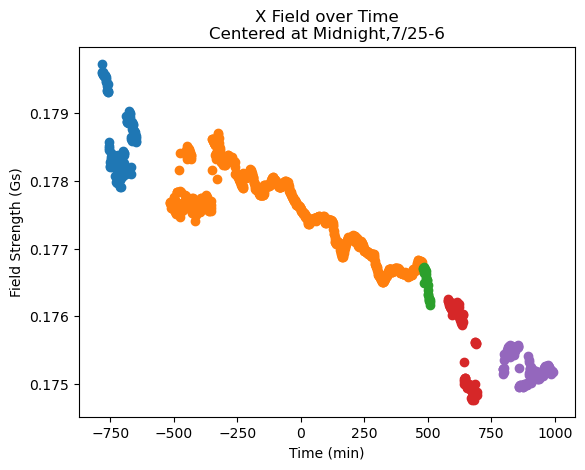

In [342]:
plt.scatter(tb,xb)
plt.scatter(to,xo)
plt.scatter(tg,xg)
plt.scatter(tr,xr)
plt.scatter(tp,xp)
#plt.ylim(.17,.19)

plt.title("X Field over Time\nCentered at Midnight,7/25-6")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

Text(0, 0.5, 'Field Strength (Gs)')

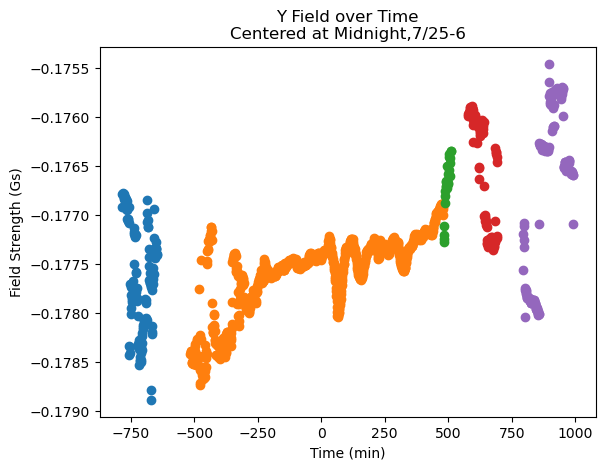

In [343]:
#multiple y
plt.scatter(tb,yb)
plt.scatter(to,yo)
plt.scatter(tg,yg)
plt.scatter(tr,yr)
plt.scatter(tp,yp)
#plt.ylim(-.185,-.171)

plt.title("Y Field over Time\nCentered at Midnight,7/25-6")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

Text(0, 0.5, 'Field Strength (Gs)')

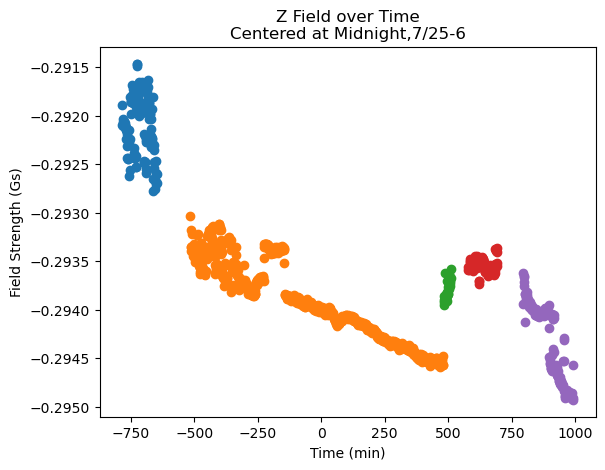

In [346]:
#multiple z
plt.scatter(tb, zb)
plt.scatter(to,zo)
plt.scatter(tg, zg)
plt.scatter(tr, zr)
plt.scatter(tp,zp)
#plt.ylim(-.3,-.27)

plt.title("Z Field over Time\nCentered at Midnight,7/25-6")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

(0.384, 0.388)

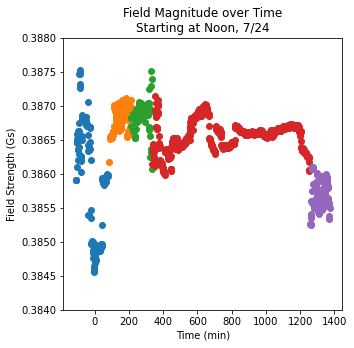

In [286]:
plt.title("Field Magnitude over Time\nStarting at Noon, 7/24")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

#multiple magnitudes
plt.scatter(tb, mb)
plt.scatter(to,mo)
plt.scatter(tg, mg)
plt.scatter(tr, mr)
plt.scatter(tp, mp)

plt.ylim(.384,.388)

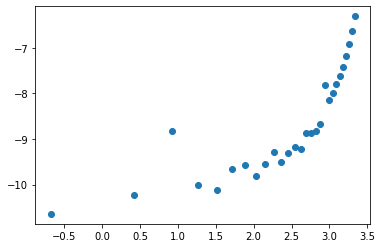

In [122]:
'''
combined = [xav, yav, zav]

baselines = [np.average(m[:100]) for m in combined]
combined = [combined[i] - baselines[i] for i in range(3)]
combined = [m[100:] for m in combined]

displacements = [np.array([np.average(m[i*20:(i+1)*20]) for i in range(len(m) // 20)]) for m in combined]
magnitude = [np.sqrt(displacements[0][i]**2 + displacements[1][i]**2 + displacements[2][i]**2) for i in range(len(displacements[0]))]
distance = [26.5 - i for i in range(len(displacements[0]))]
'''

logM = np.log(mav)
logD = np.log(tav/10)


plt.scatter(logD, logM)

"\nplt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')\nplt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')\nplt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')\nplt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')\nplt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')\nplt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')\nplt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')\nplt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')\n\nplt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')\n\nplt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')\n"

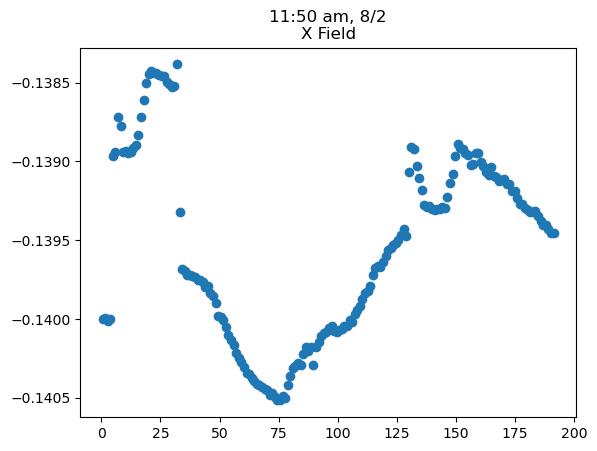

In [71]:
plt.style.use('default')
plt.scatter(tav, xav)

plt.title("11:50 am, 8/2\nX Field")

'''
plt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')
plt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')
plt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')
plt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')
plt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')
plt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')
plt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')
plt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')

plt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
'''

"\nplt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')\nplt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')\nplt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')\nplt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')\nplt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')\nplt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')\nplt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')\nplt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')\n\nplt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')\n\nplt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')\n"

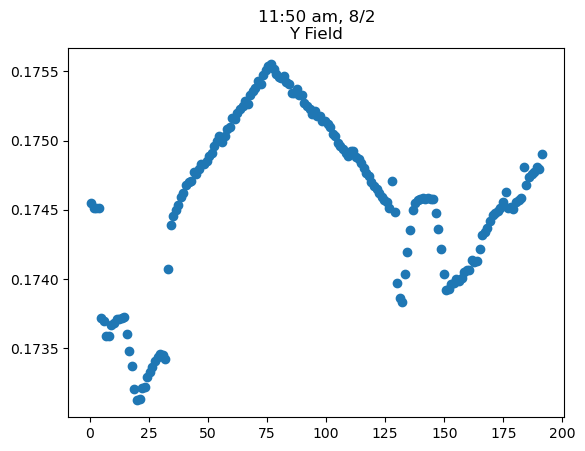

In [72]:



plt.scatter(tav, yav)

plt.title("11:50 am, 8/2\nY Field")

'''
plt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')
plt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')
plt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')
plt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')
plt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')
plt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')
plt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')
plt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')

plt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
'''

"\nplt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')\nplt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')\nplt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')\nplt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')\nplt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')\nplt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')\nplt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')\nplt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')\n\nplt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')\n\nplt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')\n"

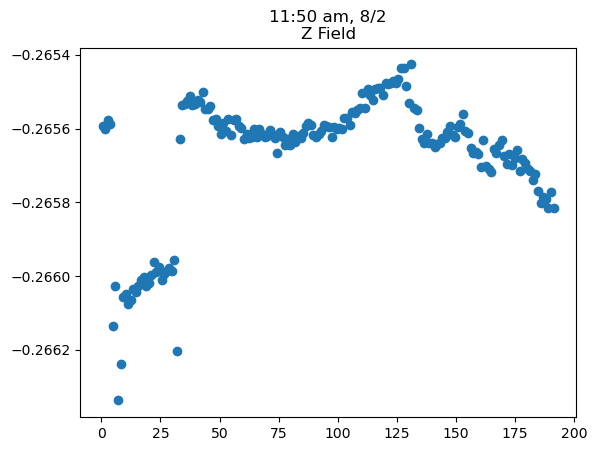

In [73]:
plt.style.use('default')

plt.scatter(tav, zav)

plt.title("11:50 am, 8/2\nZ Field")

'''
plt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')
plt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')
plt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')
plt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')
plt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')
plt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')
plt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')
plt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')

plt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
'''

Text(0, 0.5, 'Field Strength (Gs)')

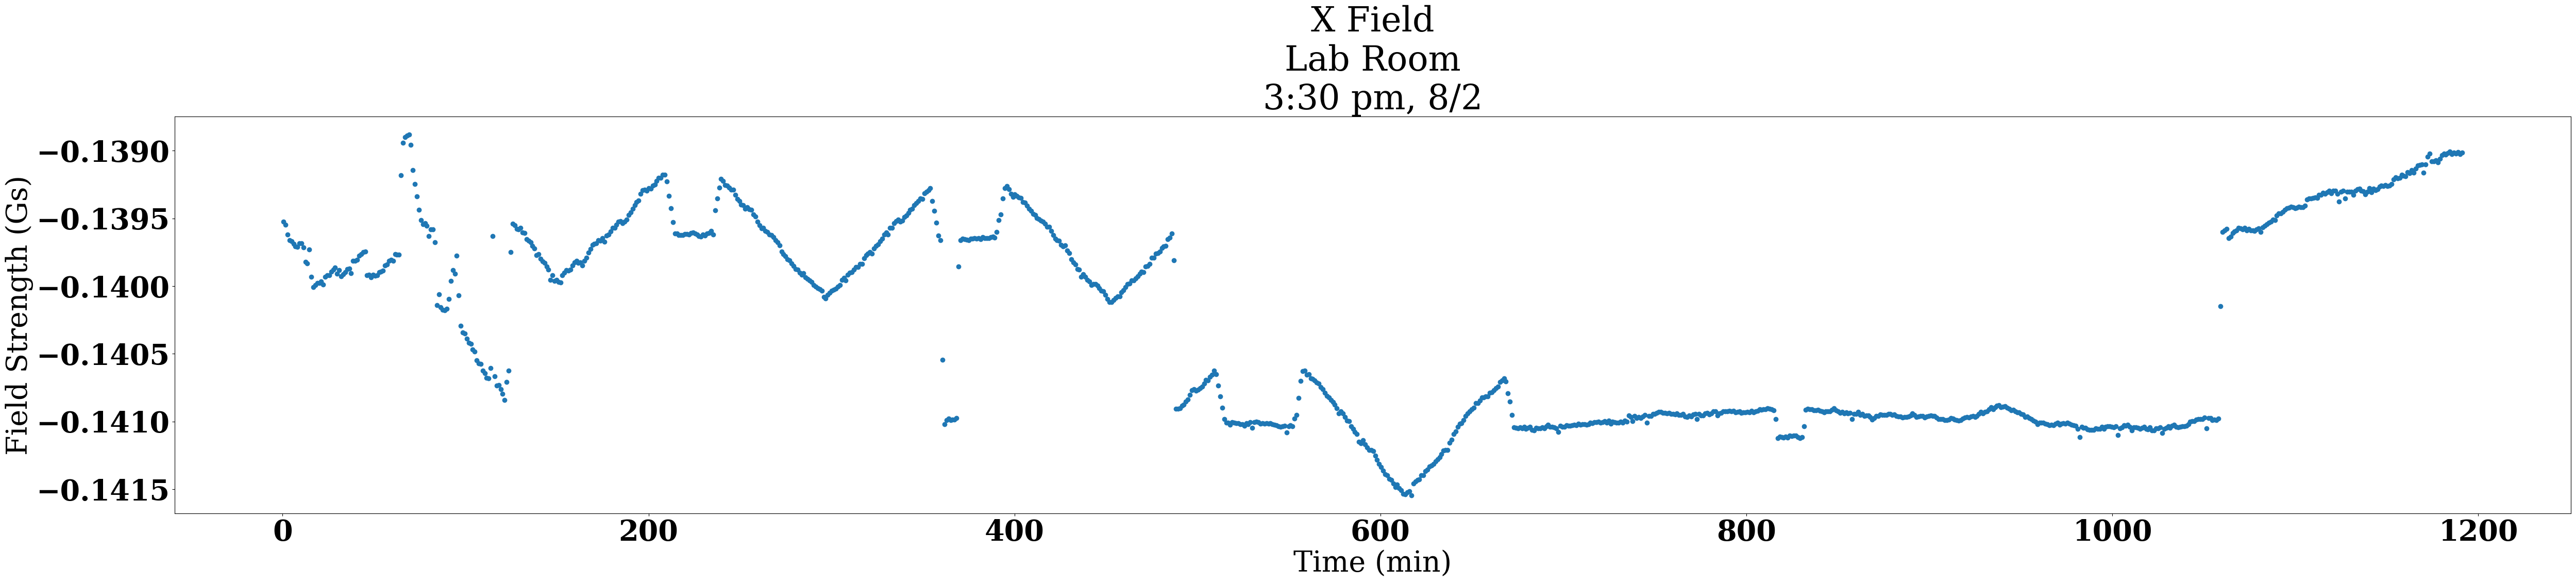

In [77]:
plt.figure(figsize=(60,10))

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.scatter(tav, xav)
#plt.xlim(0,1070)

plt.title("X Field\nLab Room\n3:30 pm, 8/2")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")



Text(0, 0.5, 'Field Strength (Gs)')

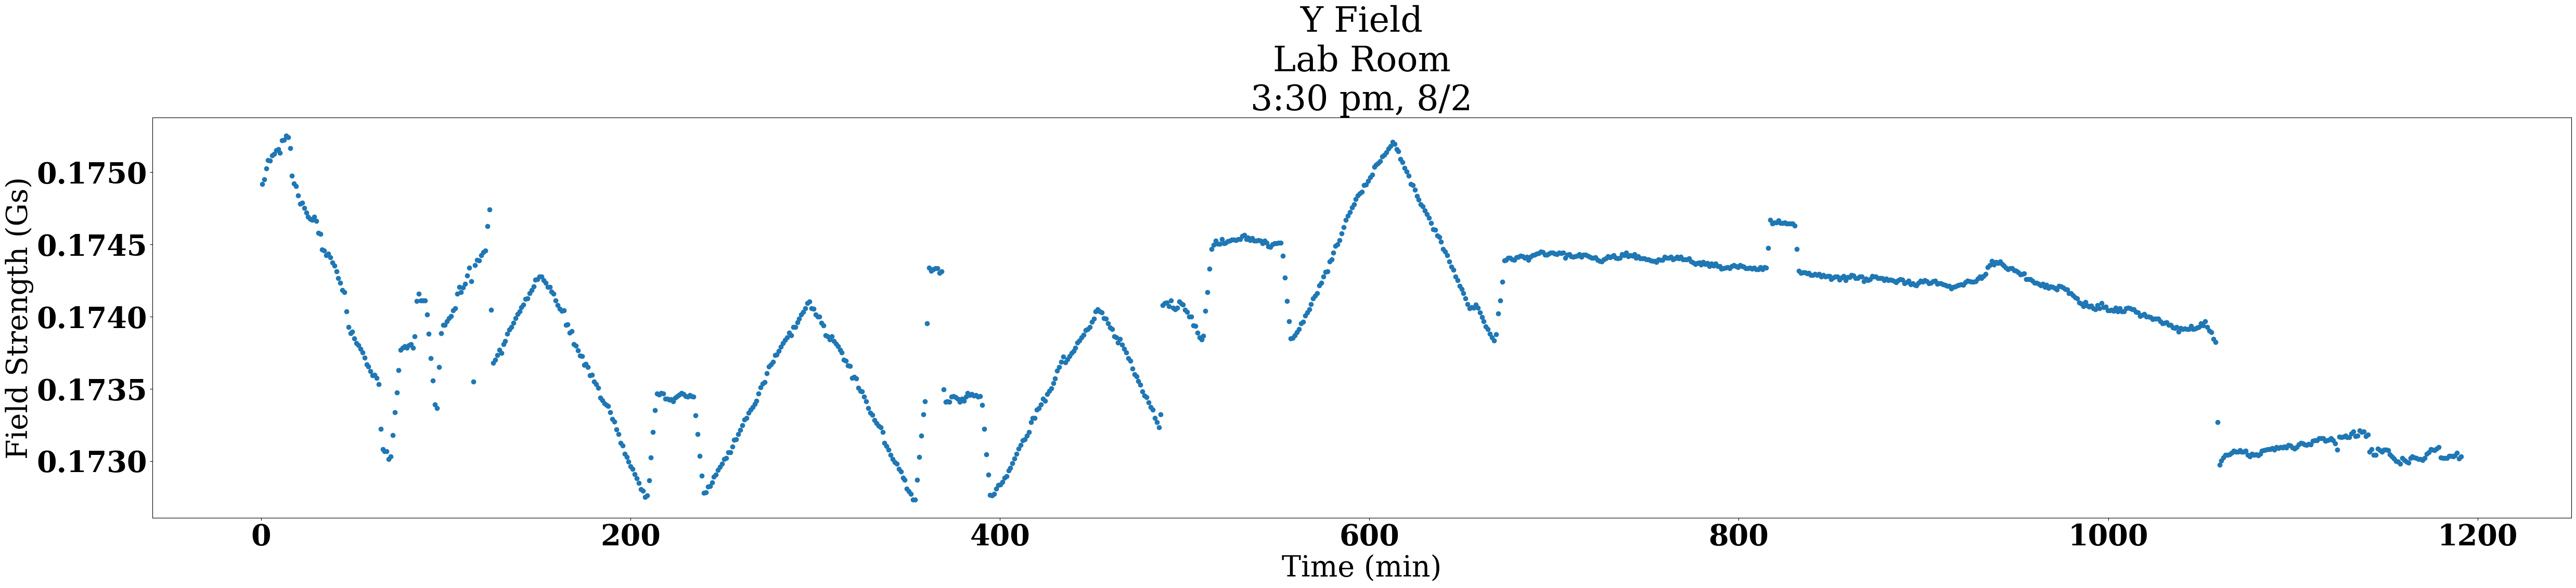

In [78]:
plt.figure(figsize=(60,10))

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.scatter(tav, yav)
#plt.xlim(0,1070)
plt.title("Y Field\nLab Room\n3:30 pm, 8/2")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

Text(0, 0.5, 'Field Strength (Gs)')

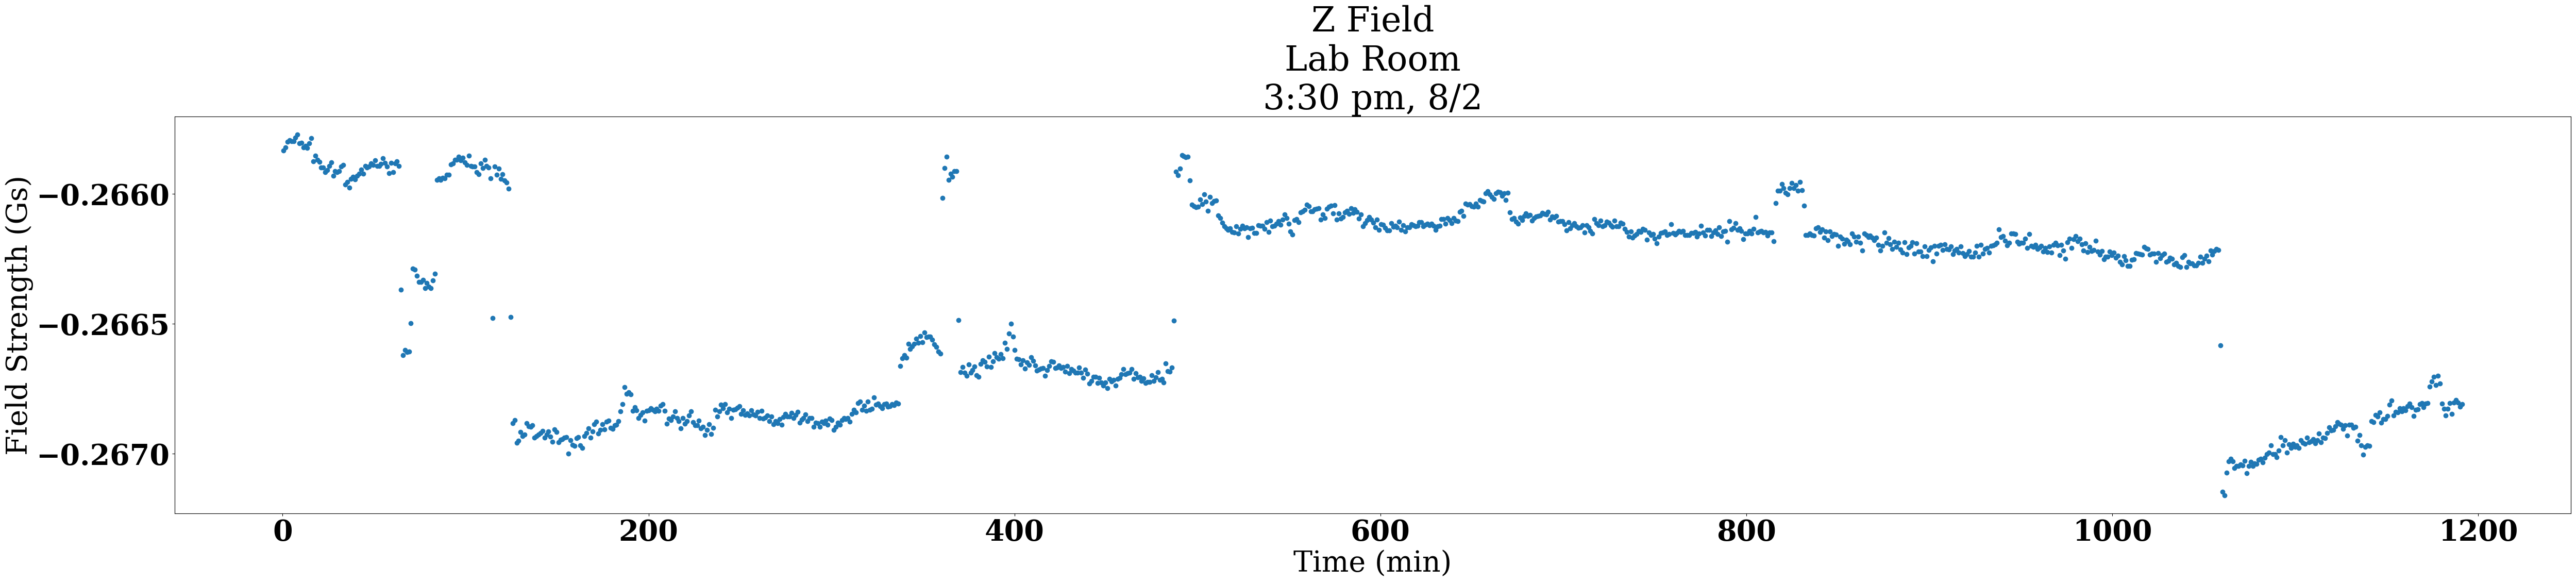

In [79]:
plt.figure(figsize=(60,10))

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.scatter(tav, zav)
#plt.xlim(0,1070)

plt.title("Z Field\nLab Room\n3:30 pm, 8/2")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

Text(0, 0.5, 'Field Strength (Gs)')

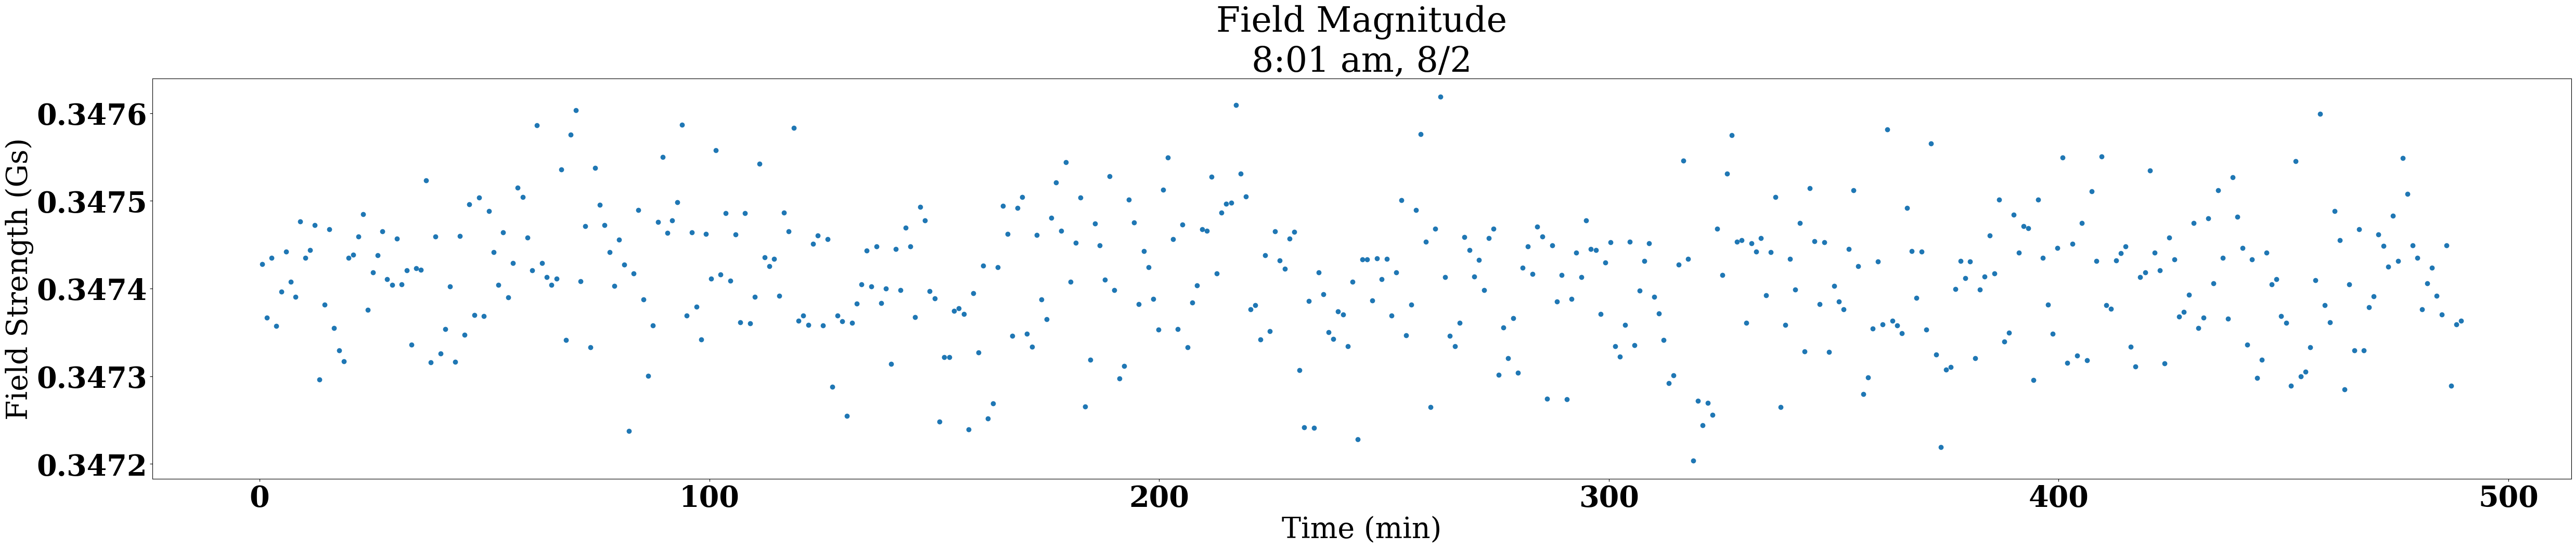

In [53]:
plt.figure(figsize=(60,10))
plt.scatter(tav, mav)


plt.title("Field Magnitude\n8:01 am, 8/2")
plt.xlabel("Time (min)")
plt.ylabel("Field Strength (Gs)")

In [ ]:
plt.axhline(y=.001, linewidth=1, color='r', linestyle='--', label = '1 Milligauss Cutoff')
plt.title("Characteristic Curve for Pixel Phone\nEvery 10 seconds represents 1 inch of reduced distance")
plt.xlabel("Time (s)")
plt.ylabel("Field Magnitude Difference from Control (Gs)")
plt.legend()

plt.axvline(x=20, linewidth=1, color='r', linestyle='--', label = 'Door Closes')
plt.axvline(x=40, linewidth=1, color='r', linestyle='--', label = 'Door Reopens')
plt.title("Characteristic Curve for Door Closure")
plt.xlabel("Time (s)")
plt.ylabel("Field Magnitude Difference from Control (Gs)")
plt.legend()


plt.title("Elevator Test:\nX Axis")
plt.xlabel("Time (s)")
plt.ylabel("Field Strength (Gs)")
plt.axvline(x=30, linewidth=1, color='r', linestyle='--', label = 'Elevator Called')
plt.axvline(x=75, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Arrives on 0th')
plt.axvline(x=110, linewidth=1, color='y', linestyle='--', label = 'Elevator Sent to 6th')
plt.axvline(x=190, linewidth=1, color='g', linestyle='--', label = 'Elevator Sent to 0th')
plt.axvline(x=225, linewidth=1, color='b', linestyle='--', label = 'Elevator Arrives on 0th')
plt.axvline(x=240, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Arrives at 1st')
plt.axvline(x=270, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator returns to 0th')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.title(f"Time-Averaged Field Magnitude\nStep Size of 1.003 s\nStandard Deviation of {np.round(np.std(mav), 5)} Gs")
plt.xlabel("Time (s)")
plt.ylabel("Field Strength (Gs)")

plt.axvline(x=20, linewidth=1, color='k', linestyle='--', label = 'Elevator Called')
plt.axvline(x=37, linewidth=1, color='tab:brown', linestyle='--', label = 'Elevator Arrives on 0th')
plt.axvline(x=65, linewidth=1, color='r', linestyle='--', label = 'Elevator Departs 0th')
plt.axvline(x=105, linewidth=1, color='tab:orange', linestyle='--', label = 'Elevator Departs 1st')
plt.axvline(x=130, linewidth=1, color='y', linestyle='--', label = 'Elevator Departs 2nd')
plt.axvline(x=155, linewidth=1, color='g', linestyle='--', label = 'Elevator Departs 3rd')
plt.axvline(x=182, linewidth=1, color='tab:cyan', linestyle='--', label = 'Elevator Departs 4th')
plt.axvline(x=195, linewidth=1, color='b', linestyle='--', label = 'Elevator Departs 5th')

plt.axvline(x=225, linewidth=1, color='tab:purple', linestyle='--', label = 'Elevator Departs 6th')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [80]:
plt.scatter(
        t,
        x)

plt.title("Freight Elevator Raw X")
plt.xlabel("Time (s)")
plt.ylabel("X Field Strength (Gs)")

#.004 without ducttape
# .0035 with

#.000640066 147
#.0006 difference 154

Text(0, 0.5, 'X Field Strength (Gs)')

Error in callback <function flush_figures at 0x0000019F3723B430> (for post_execute):


KeyboardInterrupt: 

(8.25, 19.75)

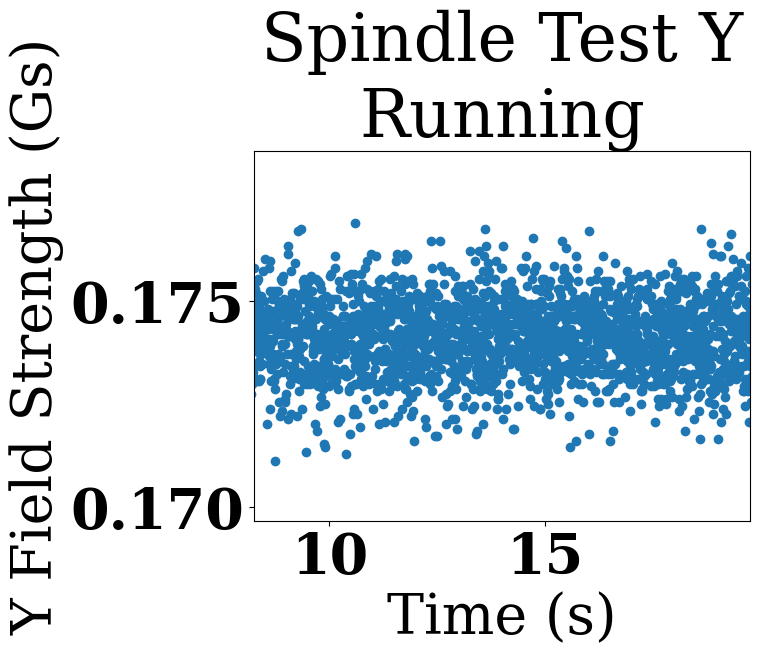

In [55]:
plt.scatter(
        t,
        y)

plt.title(f"Spindle Test Y\nRunning")
plt.xlabel("Time (s)")
plt.ylabel("Y Field Strength (Gs)")

plt.xlim(8.25,19.75)

(8.25, 19.75)

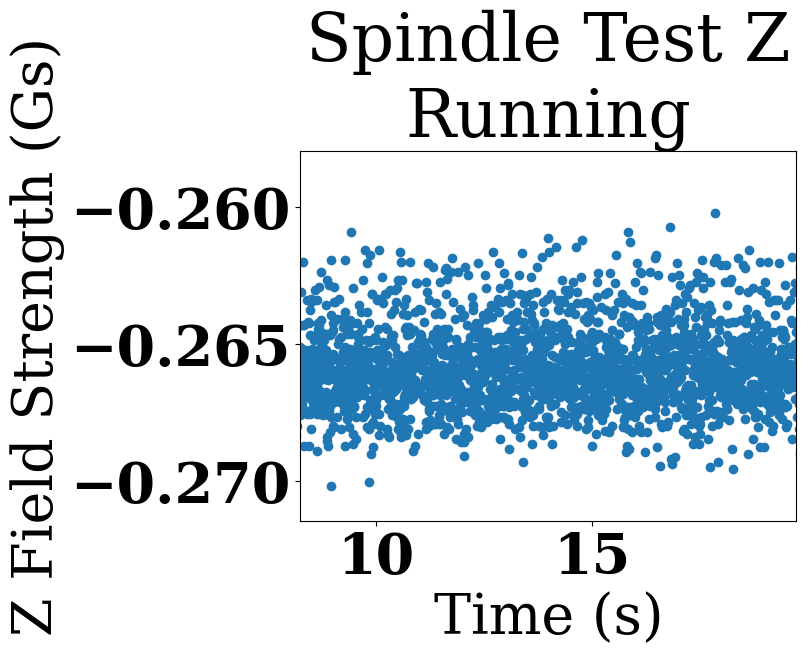

In [56]:
plt.scatter(
        t,
        z)

plt.title(f"Spindle Test Z\nRunning")
plt.xlabel("Time (s)")
plt.ylabel("Z Field Strength (Gs)")

plt.xlim(8.25,19.75)

In [218]:
print((np.average(x) * np.std(x) + np.average(y) * np.std(y) + np.average(z) * np.std(z)) / np.average(mag))

-0.0011933078572392748


Text(0, 0.5, 'Field Magnitude (Gs)')

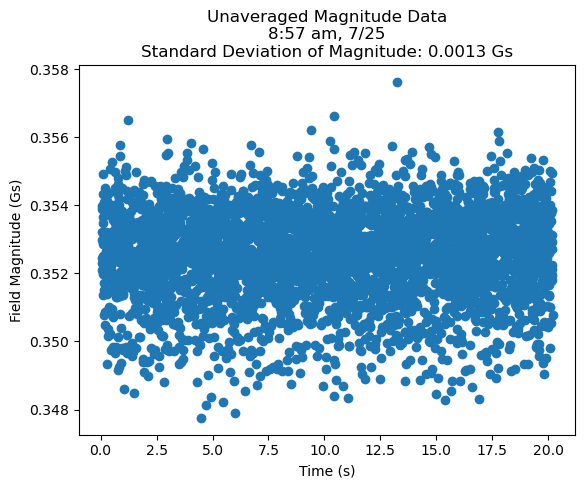

In [378]:
plt.scatter(
        t,
        mag)

plt.title(f"Unaveraged Magnitude Data\n8:57 am, 7/25\nStandard Deviation of Magnitude: {np.round(np.std(mag), 4)} Gs")
plt.xlabel("Time (s)")
plt.ylabel("Field Magnitude (Gs)")

In [229]:
print(np.sqrt(.2**2 + .2 ** 2 + .1**2))
print(np.sqrt(.025**2 + .01 ** 2 + .01**2)) #daylong

0.30000000000000004
0.028722813232690148


In [446]:
xO = x[:int(7.25 // rawStep)]
yO = y[:int(7.25 // rawStep)]
zO = z[:int(7.25 // rawStep)]
tO = t[:int(7.25 // rawStep)]

xR = x[int(8.5 // rawStep):int(19.5 // rawStep)]
yR = y[int(8.5 // rawStep):int(19.5 // rawStep)]
zR = z[int(8.5 // rawStep):int(19.5 // rawStep)]
tR = t[int(8.5 // rawStep):int(19.5 // rawStep)]

xF = x[:int(20.75 // rawStep)]
yF = y[:int(20.75 // rawStep)]
zF = z[:int(20.75 // rawStep)]
tF = t[:int(20.75 // rawStep)]

fO = bulkFourier(xO,yO,zO,tO)
fR = bulkFourier(xR,yR,zR,tR)
fF = bulkFourier(xF,yF,zF,tF)


Text(0, 0.5, 'Amplitude (Gs)')

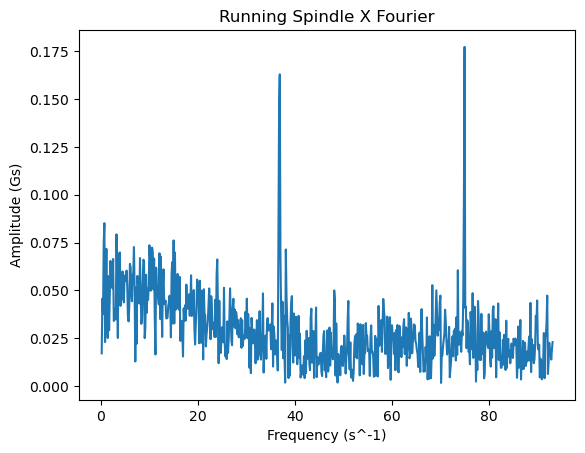

In [449]:
plt.plot(fO[4][1:len(fO[4])//2],np.abs(fO[0][1:len(fO[4])//2]))

plt.title("Running Spindle X Fourier")
plt.xlabel("Frequency (s^-1)")
plt.ylabel("Amplitude (Gs)")

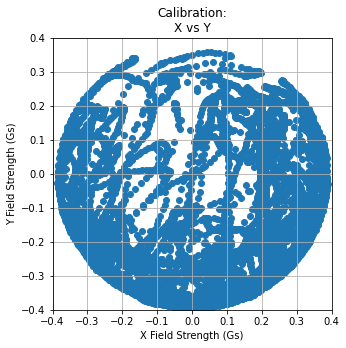

In [170]:
plt.scatter(
        x,
        y)


plt.xlim(-.4, .4)
plt.ylim(-.4, .4)

plt.title("Calibration:\nX vs Y")
plt.xlabel("X Field Strength (Gs)")
plt.ylabel("Y Field Strength (Gs)")

plt.grid()

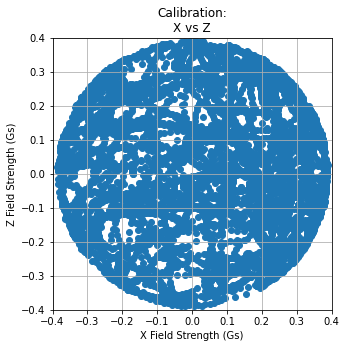

In [171]:
plt.scatter(x, z)

plt.rcParams["figure.figsize"] = [5, 5]

plt.xlim(-.4, .4)
plt.ylim(-.4, .4)

plt.title("Calibration:\nX vs Z")
plt.xlabel("X Field Strength (Gs)")
plt.ylabel("Z Field Strength (Gs)")


plt.grid()

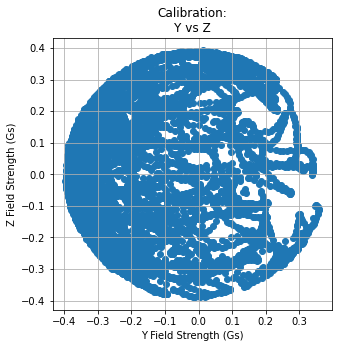

In [172]:
plt.scatter(y, z)

plt.rcParams["figure.figsize"] = [5, 5]

plt.title("Calibration:\nY vs Z")
plt.xlabel("Y Field Strength (Gs)")
plt.ylabel("Z Field Strength (Gs)")


plt.grid()

Text(0.5, 1.0, 'X Fourier')

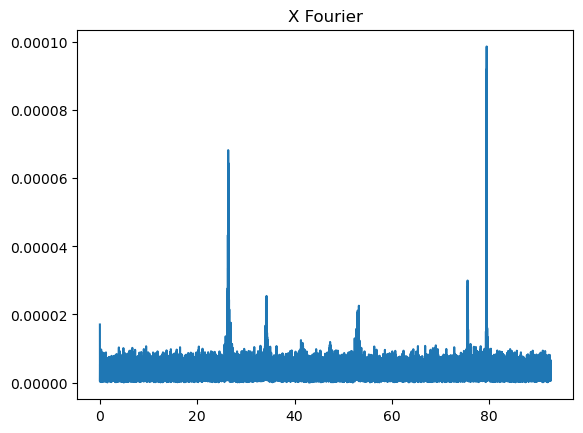

In [57]:
plt.style.use('default')

plt.plot(tf[1:len(tf)//2], 2 / len(t) * np.abs(xf[1:len(tf)//2:]))


plt.title("X Fourier")

Text(0.5, 1.0, 'Y Fourier')

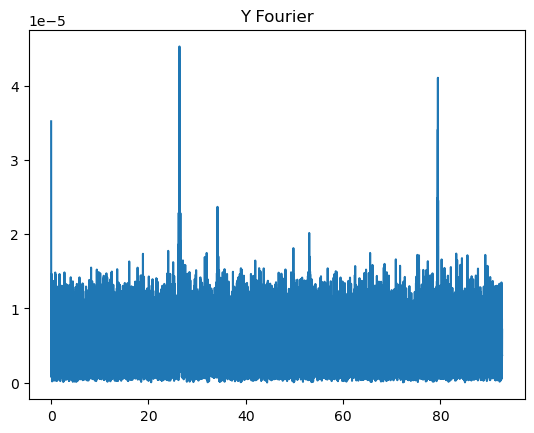

In [58]:
plt.plot(tf[1:len(tf)//2], 2 / len(t) * np.abs(yf[1:len(tf)//2:]))

plt.title("Y Fourier")

Text(0.5, 1.0, 'Z Fourier')

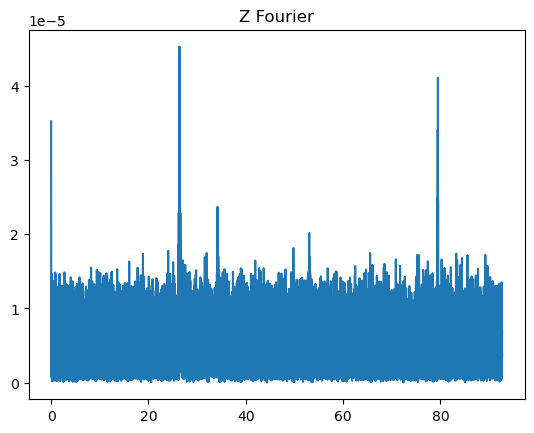

In [59]:
plt.plot(tf[1:len(tf)//2], 2 / len(t) * np.abs(yf[1:len(tf)//2:]))

plt.title("Z Fourier")

In [502]:
def clean(n):
    if np.abs(n)>.0001 and np.abs(n) < .001:
        return 0
    return n


In [503]:
xCleanF = np.array(list(map(clean,xf * 2 / len(xf)))) / 2 * len(xf)


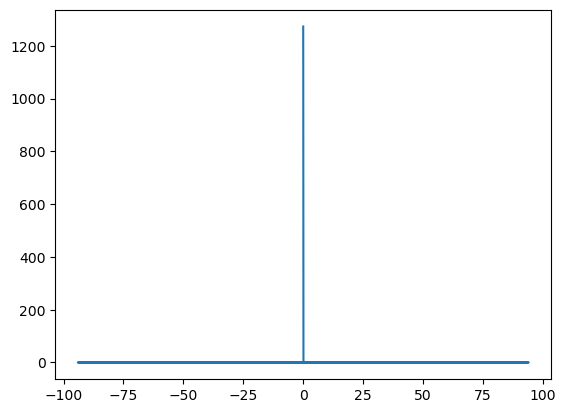

In [505]:
plt.plot(tf, np.abs(xCleanF))


In [506]:
xClean = ifft(np.abs(xCleanF))

C:\Users\nanos\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


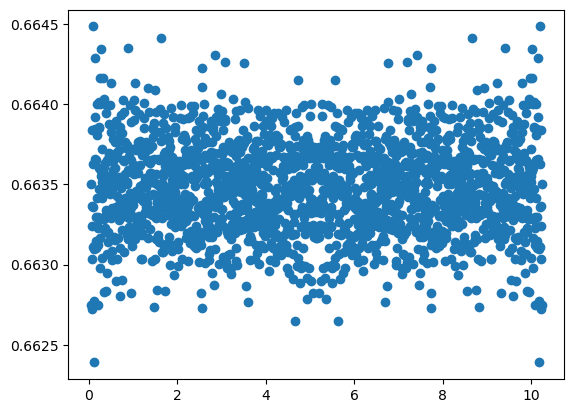

In [509]:
plt.scatter(t[1:], xClean[1:])

In [ ]:
tTest = np.linspace(0.0, 200*.1, 200, endpoint=False)
xTest = np.sin(50.0 * 2.0*np.pi*tTest)
fTest = fft(xTest)
freqTest = fftfreq(200, .1)[:200//2]
plt.plot(tTest, 2.0/200 * np.abs(yf[0:N//2]))

ShapiroResult(statistic=nan, pvalue=1.0)


(array([46., 63., 50., 19., 17., 20., 21., 53., 55., 44.]),
 array([-0.13525 , -0.130831, -0.126412, -0.121993, -0.117574, -0.113155,
        -0.108736, -0.104317, -0.099898, -0.095479, -0.09106 ]),
 <BarContainer object of 10 artists>)

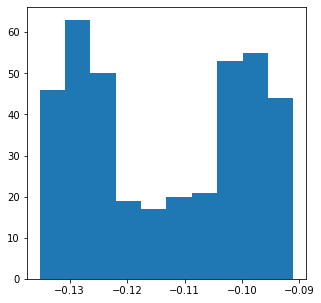

In [131]:
print(shapiro(y))
plt.hist(y)

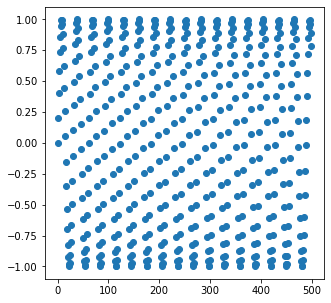

In [353]:
nu = .03278

size = 500

dummy = np.array([np.sin(2 * np.pi * i * nu) for i in range(2000)])
plt.scatter(np.array(range(2000)[:size]), dummy[:size])

0.335
-0.335


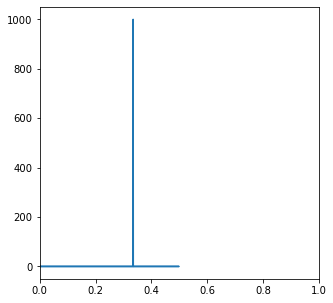

In [285]:
fdum = fft(dummy)
freqdum = fftfreq(len(dummy), 1)

for i, f in enumerate(fdum):
    if np.abs(f)>100:
        print(freqdum[i])

plt.xlim(0, 1)
plt.plot(freqdum, np.abs(fdum))

# *12.57 -> .46 -> 2.17
# 21.34 -> .34 -> 2.94

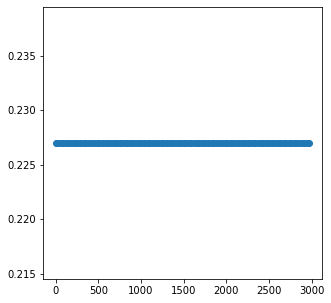

In [280]:
fin = [count * 30 + .273 for count in range(100)]
fout = []
for count in range(100):
    dummy = np.array([np.sin(2 * np.pi * i * fin[count]) for i in range(2000)])
    fdum = np.abs(fft(dummy)[1000:])
    fout.append(freqdum[np.argmax(fdum)])


    
plt.scatter(fin, fout)

#Basic conclusion, when frequency exceeds the frequency of retrieval, then the difference is all that shows up

1.3100800000000015e-06


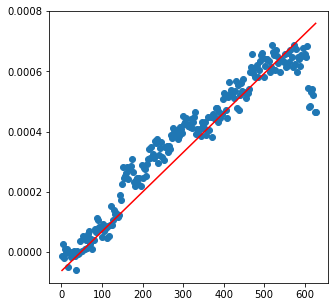

In [670]:
# for lines
plt.scatter(tav, xav, zorder = 0)
print(slope := ((xav[int(550 // stepSize)] - xav[int(50 // stepSize)]) / (500)))
plt.plot(tav, xav[int(50//stepSize)] + slope * (tav-50), c = 'r',zorder=10)

1.6437419072068703e-06


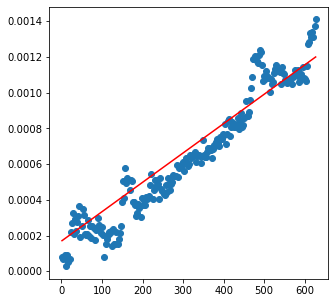

In [673]:
# for lines
mav[int(50 // stepSize):int(100//stepSize)] *= -1
plt.scatter(tav, mav, zorder = 0)
print(slope := ((mav[int(550 // stepSize)] - mav[int(50 // stepSize)]) / (500)))
plt.plot(tav, mav[int(50//stepSize)] + slope * (tav-50), c = 'r',zorder=10)

In [260]:
def combinedPlot(days,hours,minutes):
    
    colors = ['dummy','r','tab:orange','y','g','c','b','tab:purple','m','tab:brown','k']
    directions = ['X','Y','Z','','M']
    
    fieldData = [[],[],[],[],[]]
    fig, axs = plt.subplots(4, sharey=True)
    
    first = True
    
    for day,hour,minute,color in zip(days,hours,minutes,colors[:len(days)]):
        tempData = np.array(magAnalysis(f"{day}_{hour}{minute}", 188, timing=2)[1])
        
        timeOffSet = 0

        if day == min(days):
            timeOffSet -= 12 * 60
        elif hour < 8:
            timeOffSet += 12 * 60
        timeOffSet += hour * 60 + minute
        
        tempData[3] += timeOffSet 
        
        for index,datum in enumerate(tempData):
            fieldData[index] += list(datum) #remember that time is 4th in line!
            
        if not first:
            for ax in axs:
                ax.axhline(y=timeOffSet, linewidth=1, color='k', linestyle='--', label = 'Trial Change')
        
        first = False
    
    fig.suptitle('Fields Over Time')
    
    timeData=np.array(fieldData[3])
    fieldData.pop(3) 
    fieldData = np.array(fieldData)
    
    for count in range(4):
        axs[count].scatter(timeData,fieldData[count])
        axs[count].set(ylabel="Field Strength (Gs)")
    
    axs[3].set(xlabel="Time (min)")
   
        